In [12]:
import healpy as hp, numpy as np, sys, prjlib, curvedsky
#sys.path.append('/global/homes/t/toshiyan/Work/Lib/actlib/PySM_public/')
sys.path.append('/global/homes/t/toshiyan/Work/Lib/actlib/so_pysm_models/')
#sys.path.append('/global/homes/t/toshiyan/.local/cori/3.6-anaconda-4.4/lib/python3.7/site-packages/')
from mapsims import noise
from matplotlib.pyplot import *
import pickle

## Tube

In [2]:
pla = prjlib.analysis_init(t='la')
Tcmb = 2.72e6

In [3]:
nside = 2048
sim = noise.SONoiseSimulator(nside=nside, rolloff_ell=50, apply_beam_correction=True, sensitivity_mode='goal')

In [4]:
for telescope, max_id in [('LT',7),('ST',4)]:
    for tube_id in range(max_id):
        for i in range(2):
            print(telescope,tube_id,i,sim.tubes[telescope+str(tube_id)][i].center_frequency,sim.tubes[telescope+str(tube_id)][i].beam)

LT 0 0 225.7 GHz 1.0 arcmin
LT 0 1 285.4 GHz 0.9 arcmin
LT 1 0 225.7 GHz 1.0 arcmin
LT 1 1 285.4 GHz 0.9 arcmin
LT 2 0 92.0 GHz 2.2 arcmin
LT 2 1 147.5 GHz 1.4 arcmin
LT 3 0 92.0 GHz 2.2 arcmin
LT 3 1 147.5 GHz 1.4 arcmin
LT 4 0 88.6 GHz 2.2 arcmin
LT 4 1 146.5 GHz 1.4 arcmin
LT 5 0 88.6 GHz 2.2 arcmin
LT 5 1 146.5 GHz 1.4 arcmin
LT 6 0 25.7 GHz 7.4 arcmin
LT 6 1 38.9 GHz 5.1 arcmin
ST 0 0 225.7 GHz 19.0 arcmin
ST 0 1 285.4 GHz 17.0 arcmin
ST 1 0 92.0 GHz 42.0 arcmin
ST 1 1 147.5 GHz 27.0 arcmin
ST 2 0 88.6 GHz 42.0 arcmin
ST 2 1 146.5 GHz 27.0 arcmin
ST 3 0 25.7 GHz 144.0 arcmin
ST 3 1 38.9 GHz 99.0 arcmin


In [6]:
submaps = ['20','21','30','31','40','41','50','51']

In [13]:
fmap = prjlib.filename_submaps(submaps,t='la',ntype='base_roll50')

In [45]:
salm0 = pickle.load(open(fmap['50'].alms['n']['T'][1],"rb"))
salm1 = pickle.load(open(fmap['51'].alms['n']['T'][1],"rb"))

In [46]:
cl00 = curvedsky.utils.alm2cl(4096,salm0)
cl01 = curvedsky.utils.alm2cl(4096,salm0,salm1)
cl11 = curvedsky.utils.alm2cl(4096,salm1)

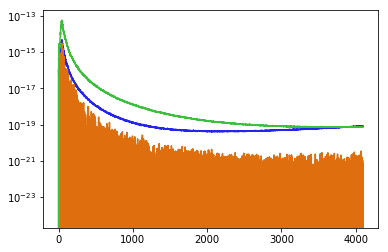

In [47]:
yscale('log')
plot(cl00)
plot(cl01)
plot(cl11)

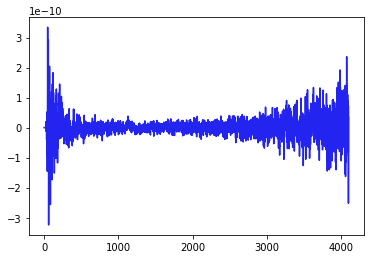

In [49]:
plot(pla.l,pla.l**3*cl01)

## Noise Simulation

In [5]:
m0 = sim.simulate(tube='LT0')
m1 = sim.simulate(tube='LT1')
m2 = sim.simulate(tube='LT2')
m3 = sim.simulate(tube='LT3')

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/mapsims/utils.py:71: UserWarning: Access data from /global/cfs/cdirs/sobs/www/so_mapsims_data/v0.2/healpix/LT0_UHF1_01_of_20.nominal_telescope_all_time_all_hmap.fits.gz
  warnings.warn(f"Access data from {full_path}")
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/mapsims/utils.py:71: UserWarning: Access data from /global/cfs/cdirs/sobs/www/so_mapsims_data/v0.2/healpix/LT0_UHF2_01_of_20.nominal_telescope_all_time_all_hmap.fits.gz
  warnings.warn(f"Access data from {full_path}")
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the defaul

OSError: CRC check failed 0x17c734da != 0x31dc45c0

In [ ]:
whit0, __ = sim.get_hitmaps(tube='LT0')
whit1, __ = sim.get_hitmaps(tube='LT1')
whit2, __ = sim.get_hitmaps(tube='LT2')
whit3, __ = sim.get_hitmaps(tube='LT3')

In [ ]:
print(np.shape(m0))

In [ ]:
hp.mollview(whit0[0]*m0[0][0][0], min=-100, max=100)

In [ ]:
lmax = 2*nside
w2 = np.average(whit0[0]**2)
l = np.linspace(0,lmax,lmax+1)
alm = curvedsky.utils.hp_map2alm(nside,lmax,lmax,whit0[0]*m0[0][0][0])
cl = curvedsky.utils.alm2cl(lmax,alm)

In [ ]:
yscale('log')
xlim(1,8000)
ylim(1,1e5)
plot(cl*l**2/2/np.pi/w2)

In [ ]:
Q = whit0[0]*m0[0][0][1]
U = whit0[0]*m0[0][0][2]
#Q = whit0[0]*m0[0][0][1] + whit1[0]*m1[0][0][1] + whit2[0]*m2[0][0][1] + whit3[0]*m3[0][0][1]
#U = whit0[1]*m0[0][0][2] + whit1[1]*m1[0][0][2] + whit2[1]*m2[0][0][2] + whit3[1]*m3[0][0][2]
Elm, Blm = curvedsky.utils.hp_map2alm_spin(nside,lmax,lmax,2,Q,U)
clee = curvedsky.utils.alm2cl(lmax,Elm)
clbb = curvedsky.utils.alm2cl(lmax,Blm)

In [ ]:
yscale('log')
xlim(1,8000)
ylim(1e-2,1e5)
s = l**2/2/np.pi
plot(pla.l,pla.lcl[1,:]*pla.l**2/2/np.pi*Tcmb**2)
plot(clee*s/w2)
#plot( s * (8*np.pi/10800.)**2*2 * np.exp(l**2*(2.2*np.pi/10800.)**2/8./np.log(2.)) )

In [ ]:
fnameo = 'lacom_goal_roll50_mv3_a5.0deg_none_o.dat'
fnamen = 'lacom_goal_roll50_mv3_a5.0deg_none_n.dat'
l, TT, EE, BB = np.loadtxt('../../data/sodelens/cmbsims/aps/'+fnameo,unpack=True,usecols=(0,1,2,3))
l, TN, EN, BN = np.loadtxt('../../data/sodelens/cmbsims/aps/'+fnamen,unpack=True,usecols=(0,1,2,3))
print(np.shape(TT))

In [ ]:
yscale('log')
ylim(1e-14,1e-7)
s = l**2/2/np.pi
plot(l,s*(TT-TN))
plot(l,s*(EE-EN))
plot(l,s*(BB-BN))
plot(l,s*TN)
plot(l,s*EN)
plot(l,s*BN)
plot(pla.l,pla.lcl[1,:]*pla.l**2/2/np.pi,color='k')

## Signal Simulation

In [ ]:
i = 1
fname = "/global/project/projectdirs/sobs/v4_sims/mbs/cmb/fullskyLensedUnabberatedCMB_alm_set00_"+str(i).zfill(5)+".fits"
Tlm, Elm, Blm = np.complex128( hp.read_alm(fname, hdu=(1, 2, 3) ) )
lmax  = hp.sphtfunc.Alm.getlmax( len(Tlm) )
l = np.linspace(0,lmax,lmax+1)

In [ ]:
theta = sim.tubes['LT0'][1].beam / sim.tubes['LT0'][1].beam._unit
bl = np.exp( -l*(l+1)*(theta*np.pi/10800.)**2/16./np.log(2.) )

In [ ]:
Tlm = hp.almxfl( Tlm, bl )
Elm = hp.almxfl( Elm, bl )
Blm = hp.almxfl( Blm, bl )
map = hp.alm2map( np.array((Tlm,Elm,Blm)), nside )

In [ ]:
hp.mollview(whit[0]*map[2])

In [ ]:
Elm, Blm = curvedsky.utils.hp_map2alm_spin(nside,lmax,lmax,2,map[1],map[2])
clee = curvedsky.utils.alm2cl(lmax,Elm)
clbb = curvedsky.utils.alm2cl(lmax,Blm)

In [ ]:
yscale('log')
xlim(1,8000)
ylim(1e-2,1e5)
s = l**2/2/np.pi
plot(pla.l,pla.lcl[1,:]*pla.l**2/2/np.pi*Tcmb**2)
plot(clee*s/bl**2)
plot( s * (8*np.pi/10800.)**2*2 * np.exp(l**2*(2.2*np.pi/10800.)**2/8./np.log(2.)) )